In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  PlannerPropReg1NewS


Current folders are:
PlannerPropReg1NewS.0
PlannerPropReg1NewS.1
PlannerPropReg1NewS.2
PlannerPropReg1NewS.3


In [3]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
        "_total_inv_goods_revenues_", "_total_cons_goods_revenues_",
       "_total_inv_goods_inventories_","_total_in_progress_inv_goods_inventories_",
       "_total_cons_goods_inventories_","_total_in_progress_cons_goods_inventories_", "_total_lost_production_",
       "_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_", "_total_grossInvestmentQ_"]

In [5]:
# series database
series={}
for name in names:
    k=0
    #which folder
    os.chdir("../"+folder+"."+str(k))
    #create the dataframe with the content of the folder with extension 0 (k value here)
    #for the 'name' series
    series[name]=pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None)

    for k in range(1,rankNum):   #add the same series from the other folders
        #which folder
        os.chdir("../"+folder+"."+str(k))
        series[name]=series[name].add(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

'_total_production_'

,0,1
0,4212.225927,485.588361
1,4401.612940,494.920561
2,4444.265523,478.913989
3,4392.538708,495.714915
4,4463.434200,495.674091
...,...,...
259,158.887631,13.751874
260,141.137643,20.513619
261,153.641725,20.105888
262,149.147580,19.110403


'____________________________________________________________'

'_total_cost_of_production_'

,0,1
0,15963.194444,1843.263889
1,16494.125000,1832.680556
2,16592.902778,1783.291667
3,16488.833333,1823.861111
4,16617.597222,1866.194444
...,...,...
259,1007.180556,91.722222
260,878.416667,123.472222
261,943.680556,118.180556
262,927.805556,127.000000


'____________________________________________________________'

'_total_cost_of_unused_factors_'

,0,1
0,66931.087958,7379.605977
1,66400.157403,7390.189310
2,66301.379625,7439.578199
3,66405.449069,7399.008754
4,66276.685181,7356.675421
...,...,...
259,88830.255598,9926.031728
260,88969.897806,9892.612021
261,88908.578543,9845.241181
262,88821.138859,9825.840856


'____________________________________________________________'

'_total_inv_goods_revenues_'

,0,1
0,0.0,1694.166439
1,0.0,1897.022850
2,0.0,1897.821920
3,0.0,1944.704802
4,0.0,1964.586363
...,...,...
259,0.0,94.101741
260,0.0,122.145256
261,0.0,124.918089
262,0.0,130.080132


'____________________________________________________________'

'_total_cons_goods_revenues_'

,0,1
0,14516.547720,0.0
1,16931.786366,0.0
2,17302.750413,0.0
3,17245.793098,0.0
4,17421.955435,0.0
...,...,...
259,1056.162172,0.0
260,938.738654,0.0
261,978.830425,0.0
262,964.058576,0.0


'____________________________________________________________'

'_total_inv_goods_inventories_'

,0,1
0,0,1932.516667
1,0,2176.687728
2,0,2181.137100
3,0,2223.592958
4,0,2242.449266
...,...,...
259,0,108.988600
260,0,141.004915
261,0,143.037437
262,0,150.058236


'____________________________________________________________'

'_total_in_progress_inv_goods_inventories_'

,0,1
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
259,0,0.0
260,0,0.0
261,0,0.0
262,0,0.0


'____________________________________________________________'

'_total_cons_goods_inventories_'

,0,1
0,16612.658333,0
1,19370.403669,0
2,19780.820081,0
3,19721.318280,0
4,19905.040460,0
...,...,...
259,1205.054206,0
260,1064.703146,0
261,1119.386714,0
262,1106.814623,0


'____________________________________________________________'

'_total_in_progress_cons_goods_inventories_'

,0,1
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
259,0.0,0
260,0.0,0
261,0.0,0
262,0.0,0


'____________________________________________________________'

'_total_lost_production_'

,0,1
0,240.342418,23.729541
1,222.585944,19.507140
2,234.693923,13.643112
3,227.861330,14.747361
4,219.016983,22.731993
...,...,...
259,7.875003,1.250668
260,8.066676,1.357596
261,6.878618,1.494856
262,9.121588,1.601945


'____________________________________________________________'

'_total_cost_of_lost_production_'

,0,1
0,860.777778,86.430556
1,790.222222,70.555556
2,827.263889,54.680556
3,813.152778,59.972222
4,772.583333,81.138889
...,...,...
259,45.861111,7.055556
260,45.861111,8.819444
261,40.569444,5.291667
262,49.388889,7.055556


'____________________________________________________________'

'_updatedLabor_'

,0,1
0,45137.0,5038.0
1,45137.0,5038.0
2,45137.0,5038.0
3,45137.0,5038.0
4,45137.0,5038.0
...,...,...
259,82310.0,9180.0
260,82365.0,9133.0
261,82312.0,9128.0
262,82312.0,9128.0


'____________________________________________________________'

'_updatedCapital_'

,0,1
0,2.471386e+06,273918.754830
1,2.471386e+06,273918.754830
2,2.471386e+06,273918.754830
3,2.471386e+06,273918.754830
4,2.471386e+06,273918.754830
...,...,...
259,4.934169e+05,54725.514130
260,4.900751e+05,54354.877314
261,4.867818e+05,53989.583303
262,4.835139e+05,53627.080201


'____________________________________________________________'

'_total_grossInvestmentQ_'

,0,1
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
259,32.035828,3.558476
260,26.192208,2.907257
261,34.007968,3.763507
262,34.786833,3.842097


'____________________________________________________________'

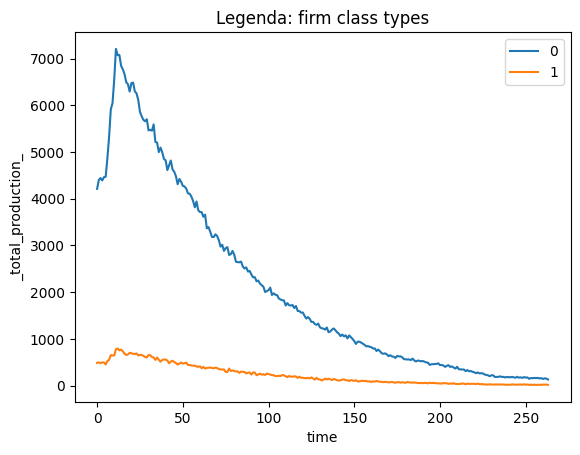

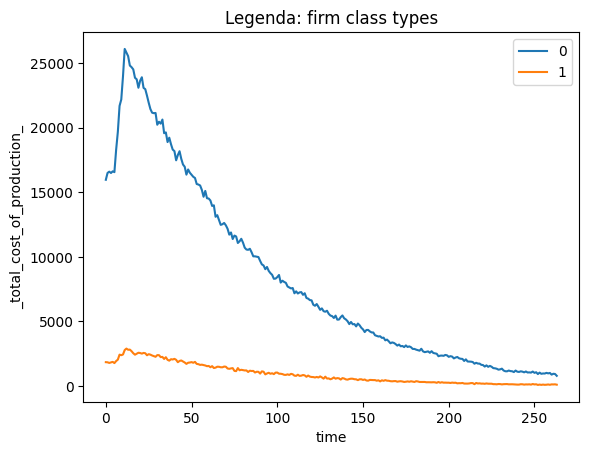

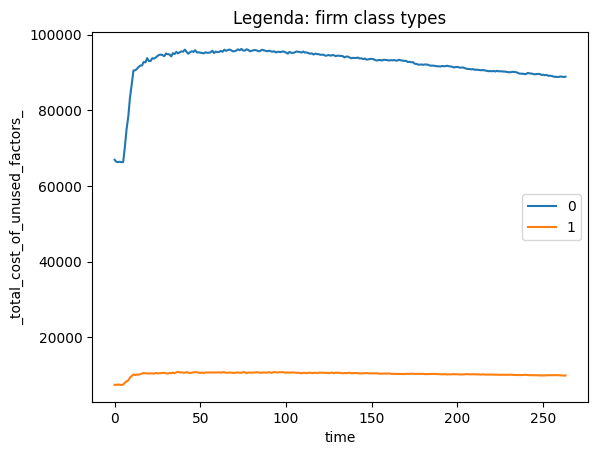

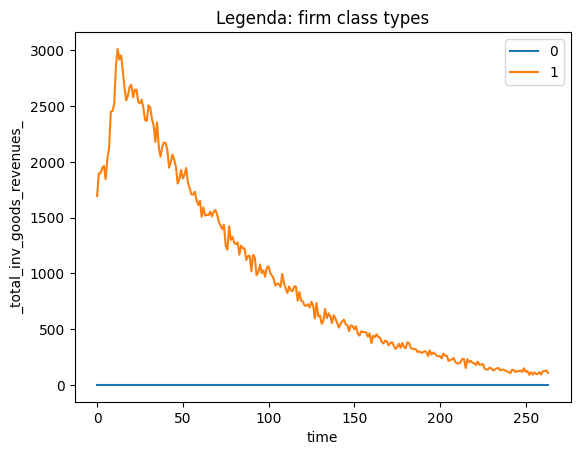

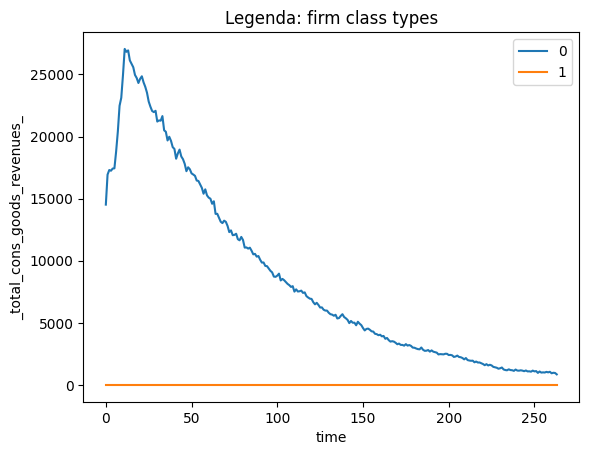

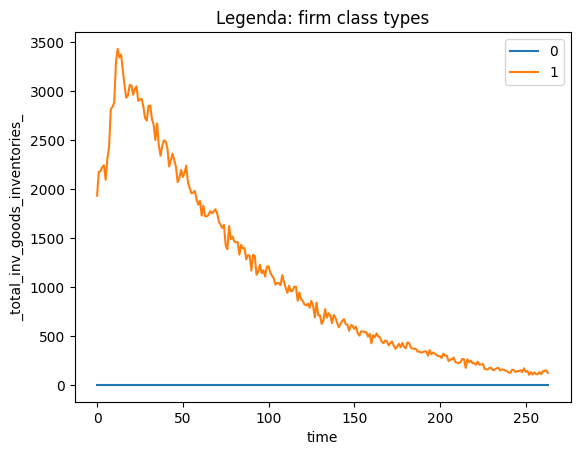

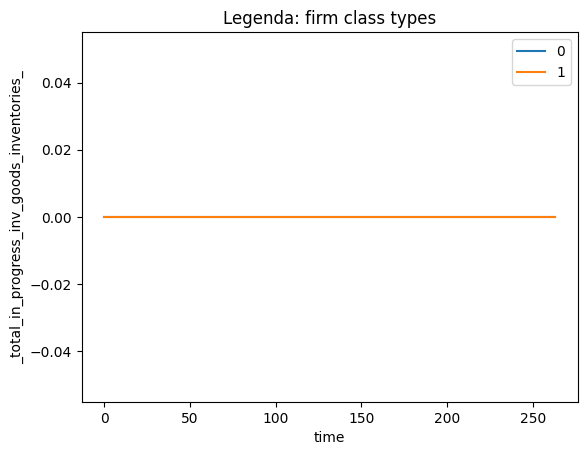

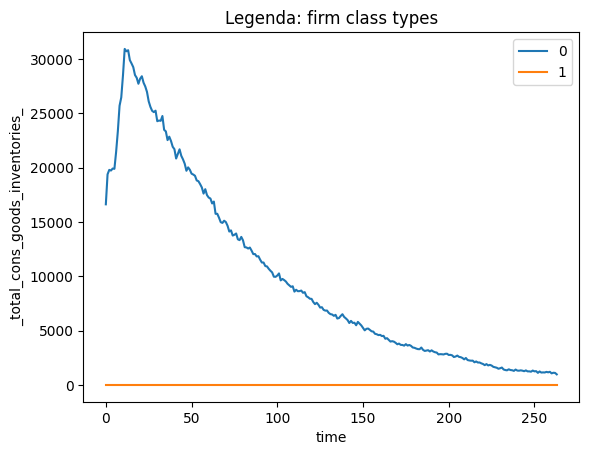

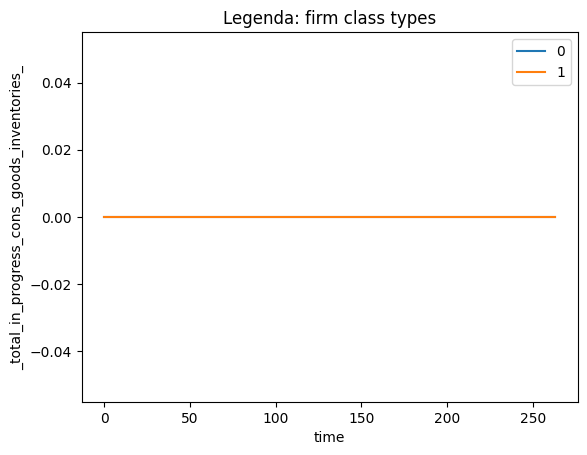

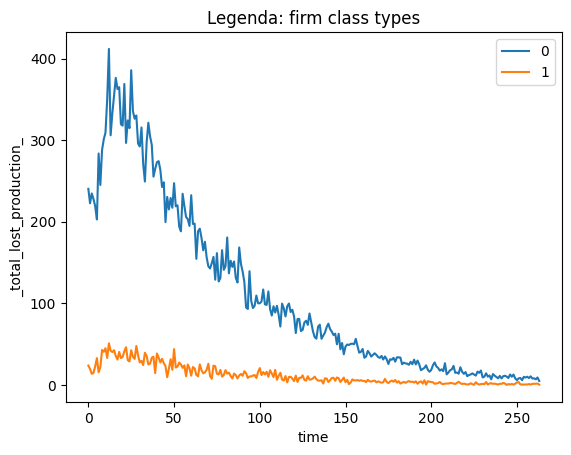

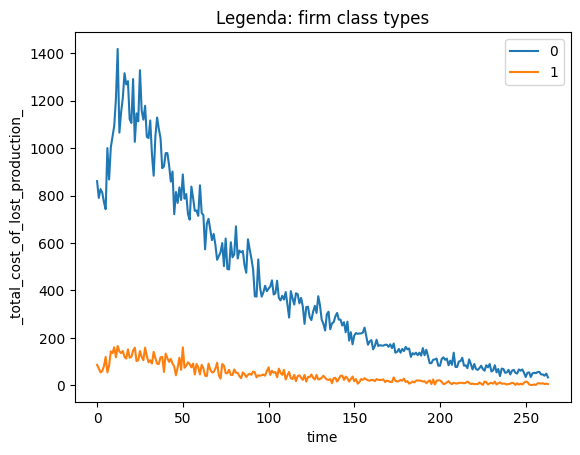

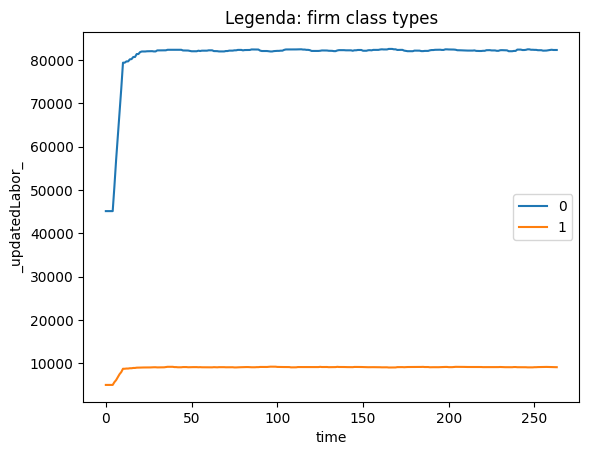

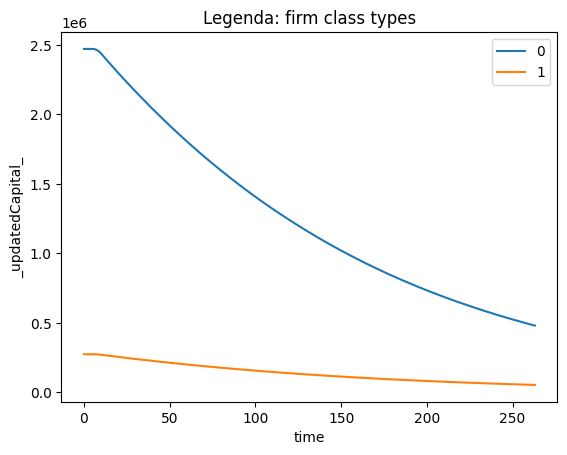

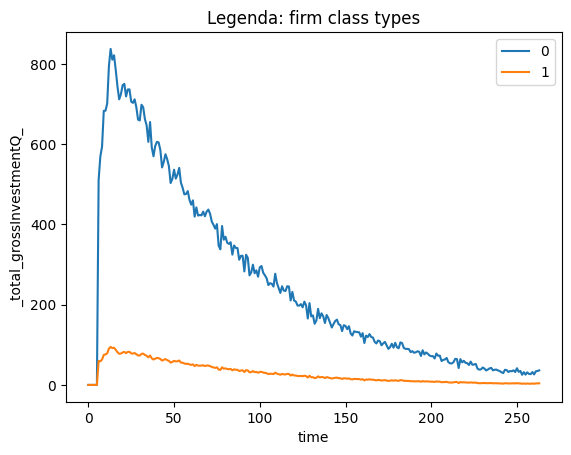

In [6]:
for name in names:
    display(name)
    display(series[name])
    display("____________________________________________________________")
    series[name].plot(title="Legenda: firm class types",xlabel="time",ylabel=name)